In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split, GridSearchCV
import imblearn
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

In [2]:
# Import the data into a dataframe
test_original = pd.read_csv('data/Test.csv')
train_original = pd.read_csv('data/train.csv')

#test = test.drop('uniqueid', axis=1)
#train = train.drop('uniqueid', axis=1)

In [3]:
train_original.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Make bins for household size in train
household_bins = pd.cut(train_original['household_size'], [1, 3, 7, 10, 25], labels=['single', 'small', 'average', 'big'])
household_bins.name = 'household_sizes'

train = train_original.join(household_bins, how='inner')
train = train.drop('household_size', axis=1)
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,24,Female,Spouse,Married/Living together,Secondary education,Self employed,single
1,Kenya,2018,uniqueid_2,No,Rural,No,70,Female,Head of Household,Widowed,No formal education,Government Dependent,small
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,small
3,Kenya,2018,uniqueid_4,No,Rural,Yes,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,small
4,Kenya,2018,uniqueid_5,No,Urban,No,26,Male,Child,Single/Never Married,Primary education,Informally employed,average


In [5]:
# Make bins for household size in test
household_bins = pd.cut(test_original['household_size'], [1, 3, 7, 10, 25], labels=['single', 'small', 'average', 'big'])
household_bins.name = 'household_sizes'

test = test_original.join(household_bins, how='inner')
test = test.drop('household_size', axis=1)
test.head()

,country,year,uniqueid,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes
0,Kenya,2018,uniqueid_6056,Urban,Yes,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,single
1,Kenya,2018,uniqueid_6060,Urban,Yes,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,small
2,Kenya,2018,uniqueid_6065,Rural,No,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,single
3,Kenya,2018,uniqueid_6072,Rural,No,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,small
4,Kenya,2018,uniqueid_6073,Urban,No,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,single


In [6]:
# Make bins for age in train
age_bins = pd.cut(train_original['age_of_respondent'], [0, 16, 45, 75, 100], labels=['child', 'adult', 'elder', 'old'])
age_bins.name = 'ages'

train = train_original.join(age_bins, how='inner')
train = train.drop('age_of_respondent', axis=1)
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ages
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,Female,Spouse,Married/Living together,Secondary education,Self employed,adult
1,Kenya,2018,uniqueid_2,No,Rural,No,5,Female,Head of Household,Widowed,No formal education,Government Dependent,elder
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,adult
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,adult
4,Kenya,2018,uniqueid_5,No,Urban,No,8,Male,Child,Single/Never Married,Primary education,Informally employed,adult


In [7]:
# Make bins for age in test
age_bins = pd.cut(test_original['age_of_respondent'], [0, 16, 45, 75, 100], labels=['child', 'adult', 'elder', 'old'])
age_bins.name = 'ages'

test = test_original.join(age_bins, how='inner')
test = test.drop('age_of_respondent', axis=1)
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ages
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,adult
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,elder
2,Kenya,2018,uniqueid_6065,Rural,No,3,Female,Parent,Married/Living together,No formal education,Remittance Dependent,old
3,Kenya,2018,uniqueid_6072,Rural,No,6,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,adult
4,Kenya,2018,uniqueid_6073,Urban,No,3,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,child


In [8]:
# drop unique id for train and test df
test = test.drop('uniqueid', axis=1)
train = train.drop('uniqueid', axis=1)

In [9]:
# make dummie variables for train
train = pd.get_dummies(train, drop_first=True)
train.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
household_size,3,5,5,5,8
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
bank_account_Yes,True,False,True,False,False
location_type_Urban,False,False,True,False,True
cellphone_access_Yes,True,False,True,True,False
gender_of_respondent_Male,False,False,True,False,True
relationship_with_head_Head of Household,False,True,False,True,False


In [10]:
# make dummie variables for test
test = pd.get_dummies(test, drop_first=True)
test.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
household_size,3,7,3,6,3
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False


In [11]:
# Train-test Split

# Defining X and y
features = train.columns.tolist()
features.remove('bank_account_Yes')

X = train[features]
y = train.bank_account_Yes

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (16466, 34)
y_train: (16466,)
X_test: (7058, 34)
y_test: (7058,)


In [12]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [13]:
# Perform oversampling on the minority class
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

## Decision Tree

In [14]:
# Create Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predict
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[5675  389]
 [ 614  380]]
              precision    recall  f1-score   support

       False       0.90      0.94      0.92      6064
        True       0.49      0.38      0.43       994

    accuracy                           0.86      7058
   macro avg       0.70      0.66      0.67      7058
weighted avg       0.84      0.86      0.85      7058



In [16]:
# Create Decision Tree with undersampling
dtree = DecisionTreeClassifier()
dtree.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [17]:
# Predict with undersampling
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[4555 1509]
 [ 336  658]]
              precision    recall  f1-score   support

       False       0.93      0.75      0.83      6064
        True       0.30      0.66      0.42       994

    accuracy                           0.74      7058
   macro avg       0.62      0.71      0.62      7058
weighted avg       0.84      0.74      0.77      7058



In [18]:
# Create Decision Tree with oversampling
dtree = DecisionTreeClassifier()
dtree.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [19]:
# Predict with oversampling
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[5071  993]
 [ 474  520]]
              precision    recall  f1-score   support

       False       0.91      0.84      0.87      6064
        True       0.34      0.52      0.41       994

    accuracy                           0.79      7058
   macro avg       0.63      0.68      0.64      7058
weighted avg       0.83      0.79      0.81      7058



---

## Random Forest

In [20]:
#Create Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Predict
y_pred_forest = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[5071  993]
 [ 474  520]]
              precision    recall  f1-score   support

       False       0.91      0.84      0.87      6064
        True       0.34      0.52      0.41       994

    accuracy                           0.79      7058
   macro avg       0.63      0.68      0.64      7058
weighted avg       0.83      0.79      0.81      7058



In [22]:
#Create Random Forest with undersampling
forest = RandomForestClassifier()
forest.fit(X_train_under, y_train_under)

RandomForestClassifier()

In [23]:
# predict with undersampling
y_pred_forest = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[5071  993]
 [ 474  520]]
              precision    recall  f1-score   support

       False       0.91      0.84      0.87      6064
        True       0.34      0.52      0.41       994

    accuracy                           0.79      7058
   macro avg       0.63      0.68      0.64      7058
weighted avg       0.83      0.79      0.81      7058



In [24]:
#Create Random Forest with oversampling
forest = RandomForestClassifier()
forest.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [25]:
# Predict with oversampling
y_pred_forest = dtree.predict(X_test)
print(y_pred_forest)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[False  True False ... False False False]
[[5071  993]
 [ 474  520]]
              precision    recall  f1-score   support

       False       0.91      0.84      0.87      6064
        True       0.34      0.52      0.41       994

    accuracy                           0.79      7058
   macro avg       0.63      0.68      0.64      7058
weighted avg       0.83      0.79      0.81      7058



---

### Decision Tree w/o over- or undersampling has best precision
__Fit test data to model__

In [26]:
test.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
household_size,3,7,3,6,3
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False


In [27]:
# Defining X and  for test
features = test.columns.tolist()
X = test[features]

# Predict
y_pred_tree = dtree.predict(X)
# print(type(y_pred_tree))
series = pd.Series(y_pred_tree).astype(int)
series.name = 'bank_account'

test_new = pd.concat([test, series], axis=1).astype(bool)
test_new.head().T

,0,1,2,3,4
year,True,True,True,True,True
household_size,True,True,True,True,True
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False


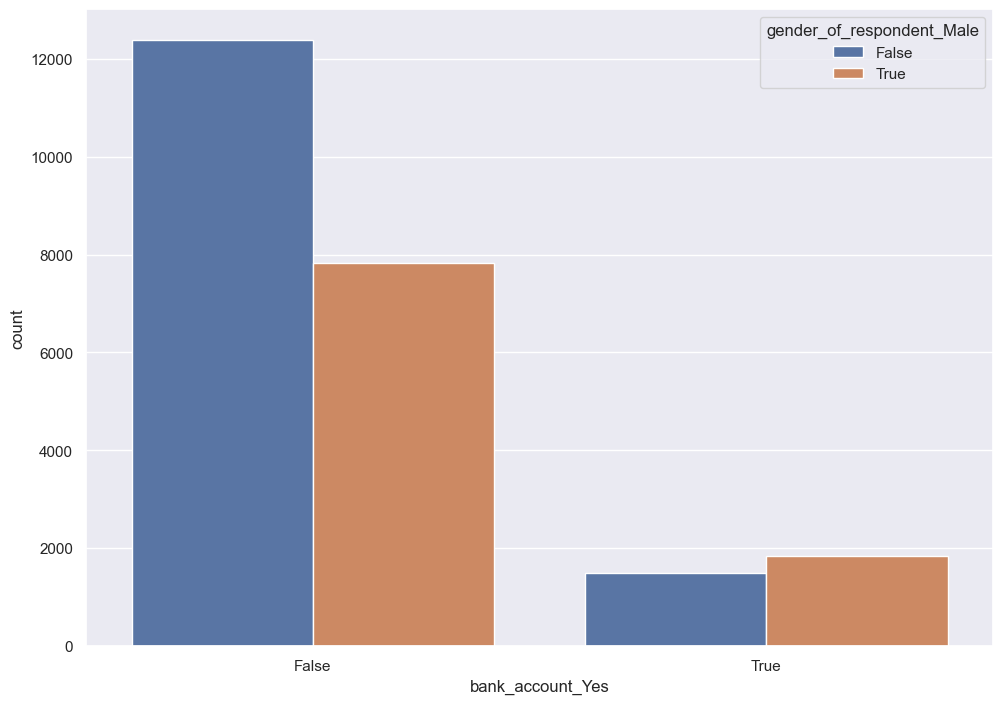

In [28]:
# make countplot for bank_account of train dataset
# Countplot with bank account, hue=gender
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train['bank_account_Yes'], hue=train['gender_of_respondent_Male']);

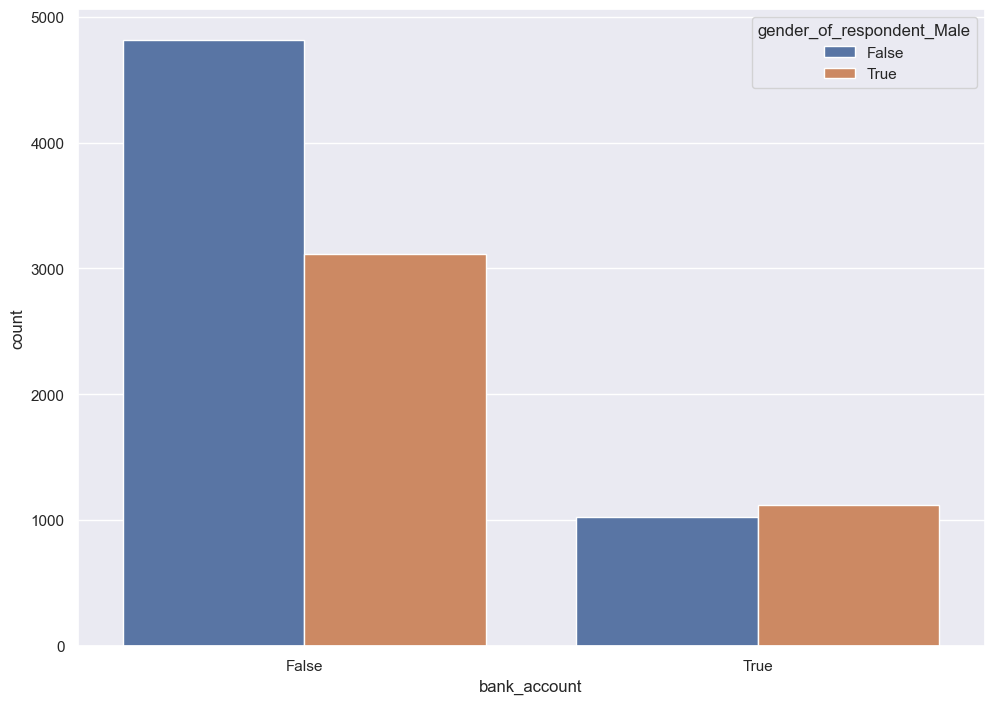

In [29]:
# make countplot for bank_account of test dataset
# Countplot with bank account, hue=gender
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=test_new['bank_account'], hue=test_new['gender_of_respondent_Male']);

### KNN Model

In [30]:
train.head()

,year,household_size,country_Rwanda,country_Tanzania,country_Uganda,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,ages_adult,ages_elder,ages_old
0,2018,3,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,2018,5,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,2018,5,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,True,True,False,False
3,2018,5,False,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,2018,8,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False


Train the KNN Model with the train dataset

In [31]:
# Splitting features and target
X = train.drop('bank_account_Yes', axis=1)
y = train['bank_account_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)  

# Make predictions
y_pred = knn.predict(X_test)

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.97      0.94      4063
        True       0.64      0.33      0.44       642

    accuracy                           0.88      4705
   macro avg       0.77      0.65      0.69      4705
weighted avg       0.87      0.88      0.87      4705



In [32]:
# Defining X and  for test
features = test.columns.tolist()
X = test[features]

# Predict
y_pred_final = knn.predict(X)
# print(type(y_pred_tree))
series_knn = pd.Series(y_pred_final).astype(int)
series_knn.name = 'bank_account'

#test_new = pd.concat([test, series], axis=1).astype(bool)
#test_new.head().T

In [33]:
test_original = pd.concat([test_original, series_knn], axis=1).astype(bool)
#test_original.head()
test_original.info()
#test_original.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 10086 non-null  bool 
 1   year                    10086 non-null  bool 
 2   uniqueid                10086 non-null  bool 
 3   location_type           10086 non-null  bool 
 4   cellphone_access        10086 non-null  bool 
 5   household_size          10086 non-null  bool 
 6   age_of_respondent       10086 non-null  bool 
 7   gender_of_respondent    10086 non-null  bool 
 8   relationship_with_head  10086 non-null  bool 
 9   marital_status          10086 non-null  bool 
 10  education_level         10086 non-null  bool 
 11  job_type                10086 non-null  bool 
 12  bank_account            10086 non-null  bool 
dtypes: bool(13)
memory usage: 128.2 KB


In [34]:
# merge train and test_new on unique id:
final_df = train_original.merge(test_original, how='outer') 
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  object
 2   uniqueid                33610 non-null  object
 3   bank_account            33610 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  object
 7   age_of_respondent       33610 non-null  object
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Export the dataframe into a csv:

# Define the path to the folder in your repository
folder_path = 'data/'

# Define the file name and extension
file_name = 'final_df.csv'

# Concatenate the folder path and file name
file_path = f'{folder_path}/{file_name}'

# Export the DataFrame to the specified folder
final_df.to_csv(file_path, index=False)